In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv('/content/sample_data/daily-minimum-temperatures-in-me.csv',engine='python', on_bad_lines='skip') #we are using engine and on_bad_lines to skip the commas or other complexx things

In [18]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [4]:
df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
#converting date into datetime and sorting it
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values('Date')
df

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [10]:
print(df.columns)

Index(['Date', 'Daily minimum temperatures in Melbourne, Australia, 1981-1990'], dtype='object')


In [22]:
#coloumn ka naam rename becoz its too long
df=df.rename(columns={
    'Daily minimum temperatures in Melbourne, Australia, 1981-1990':'Temp'
})
df.columns

Index(['Date', 'Temp'], dtype='object')

In [23]:
#converting string temp into numeric temp and glt values htadena
df['Temp']=pd.to_numeric(df['Temp'],errors='coerce')
#NaN rows remove
df=df.dropna(subset=['Temp'])

In [24]:
data=df.copy() #og data save
#feature :kl ka temperature
data['lag1']=data['Temp'].shift(1)
data=data.dropna()#missing values hatare h
X=data[['lag1']] #kl ka predicted data
Y=data[['Temp']] #hone wale aaj ka



In [25]:
#80% data train krte h model ko and 20% data lagayenge model pr test krne me
split=int(len(X)*0.8)
X_train=X.iloc[:split] #purana hissa training
X_test=X.iloc[split:] #last hissa test
Y_train=Y.iloc[:split]
Y_test=Y.iloc[split:]
print(len(X_train),len(Y_test))

2916 730


In [27]:
#making a simple regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#empty model
model=LinearRegression()
#fit model learn on training data
model.fit(X_train,Y_train)
#test data for prediction
Y_pred=model.predict(X_test)
#check any further error-->check rmse
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
rmse



np.float64(2.3772230628618547)

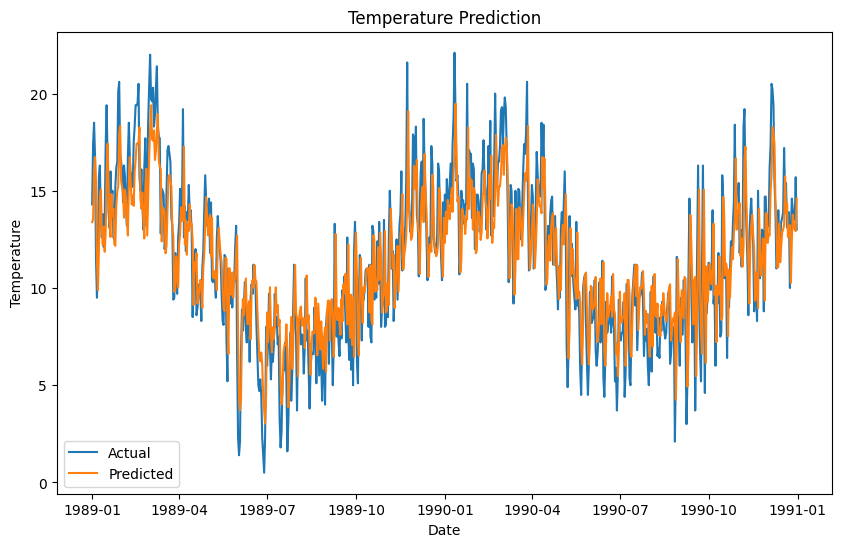

In [29]:
#graph
test_dates=data['Date'].iloc[split:] #test waale din
plt.figure(figsize=(10,6))
plt.plot(test_dates,Y_test.values,label='Actual')
plt.plot(test_dates,Y_pred,label='Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Prediction')
plt.legend()
plt.show()


In [31]:
#aaj ka temp
today_temp=data['Temp'].iloc[-1]
today_temp
#model se kal ka temp
tommorow_pred=model.predict([[today_temp]])[0]
tommorow_pred

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.54809121])